<span style="color:red;font-size:25px">
    Import the required libraries
</span>

In [68]:
from bs4 import BeautifulSoup
import requests

<span style="color:red;font-size:25px">
    Import Selenium for browser automation
</span>

In [69]:
from selenium import webdriver

options = webdriver.ChromeOptions()
options.add_argument('--ignore-certificate-errors') # -> to ignore certificate errors
options.add_argument('--incognito') # -> to use incognito mode
options.add_argument('--headless') # -> without actually opening a chrome window

# below specify the location for chromedriver
driver = webdriver.Chrome("C:/Users/Ashish Singh/Downloads/chromedriver_win32/chromedriver.exe", chrome_options = options)

C:\Users\Ashish Singh\AppData\Local\Temp\ipykernel_21176\1832797036.py:9: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome("C:/Users/Ashish Singh/Downloads/chromedriver_win32/chromedriver.exe", chrome_options = options)
C:\Users\Ashish Singh\AppData\Local\Temp\ipykernel_21176\1832797036.py:9: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome("C:/Users/Ashish Singh/Downloads/chromedriver_win32/chromedriver.exe", chrome_options = options)


In [70]:
# import By to use By.CLASS_NAME and By.XPATH to find the buttons by class
from selenium.webdriver.common.by import By

##### Choose any talk from `https://www.ted.com/talks`  
![Alt text](images/talks-page.png "a title")
##### Get its URL
![Alt text](images/talk-url.png "a title")


In [71]:
# Now we need to click the required button on the page and get the html content of the updated page
# this cell will click the specified button and then give the updated page to beautifulsoup for scraping 

import time

driver.get("https://www.ted.com/talks/julia_dhar_how_to_have_constructive_conversations?trk=public_post-text")

# use xpath when same class or id is used for buttons. otherwise you will get invalidselectorexception error
more_buttons = driver.find_elements(By.XPATH, '//*[@id="maincontent"]/div/div/div/div/div[3]/div[1]/button')

# for clicking the found botton
for x in range(len(more_buttons)):
  if more_buttons[x].is_displayed():
      driver.execute_script("arguments[0].click();", more_buttons[x])
      time.sleep(1)
page_source = driver.page_source

In [72]:
# import lxml to parse the HTML
import lxml

In [73]:
soup = BeautifulSoup(page_source, "html.parser")

In [74]:
main = soup.find('div', class_ = "mb-10 w-full")

In [75]:
transcripts = main.find('div', class_ = "w-full")

In [76]:
transcripts_each = transcripts.find_all('div', class_ = "mb-6 w-full")

In [77]:
# get all transcripts in a list
speech_block = []
for i in range(len(transcripts_each)):
    speech_block.append(transcripts_each[i].span.text)


In [79]:
# make a text file of the transcript
full_text = " ".join(speech_block)
with open('transript.txt', 'w') as file:
    file.write(full_text)
    file.close()

<span style="color:red;font-size:25px">
    Import libraries for making word cloud and for manipulating it
</span>

In [81]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt

In [82]:
from PIL import Image
import numpy as np

<span style="color:red;font-size:25px">
    To color the cloud we need to first mask the image
</span>

In [83]:
# This cell is for making binary image from color image for masking

image_file = Image.open("ted-logo-fb.png") # open colour image
thresh = 200
image_file = image_file.convert('L')
width, height = image_file.size
for x in range(width):
    for y in range(height):
        if image_file.getpixel((x, y)) < thresh:
            image_file.putpixel((x, y), 0)
        else:
            image_file.putpixel((x, y), 255)
        

image_file.save('binary-logo.png')

In [84]:
# get the backgrond of the color image
customMask = Image.open('ted-logo-fb.png')
customMask = np.array(customMask)
customMask[0]

array([[255, 255, 255, 255],
       [255, 255, 255, 255],
       [255, 255, 255, 255],
       ...,
       [255, 255, 255, 255],
       [255, 255, 255, 255],
       [255, 255, 255, 255]], dtype=uint8)

In [85]:
text = full_text

In [86]:
discard = STOPWORDS

In [87]:
# generate the world cloud from the text
cloud = WordCloud(background_color=(255, 255, 255), stopwords = discard, mask= customMask).generate(text)

In [88]:
cloud.generate(text)

In [89]:
# now recolor the image

In [90]:
from wordcloud import ImageColorGenerator

In [91]:
imageColor = ImageColorGenerator(customMask)
cloud.recolor(color_func=imageColor)


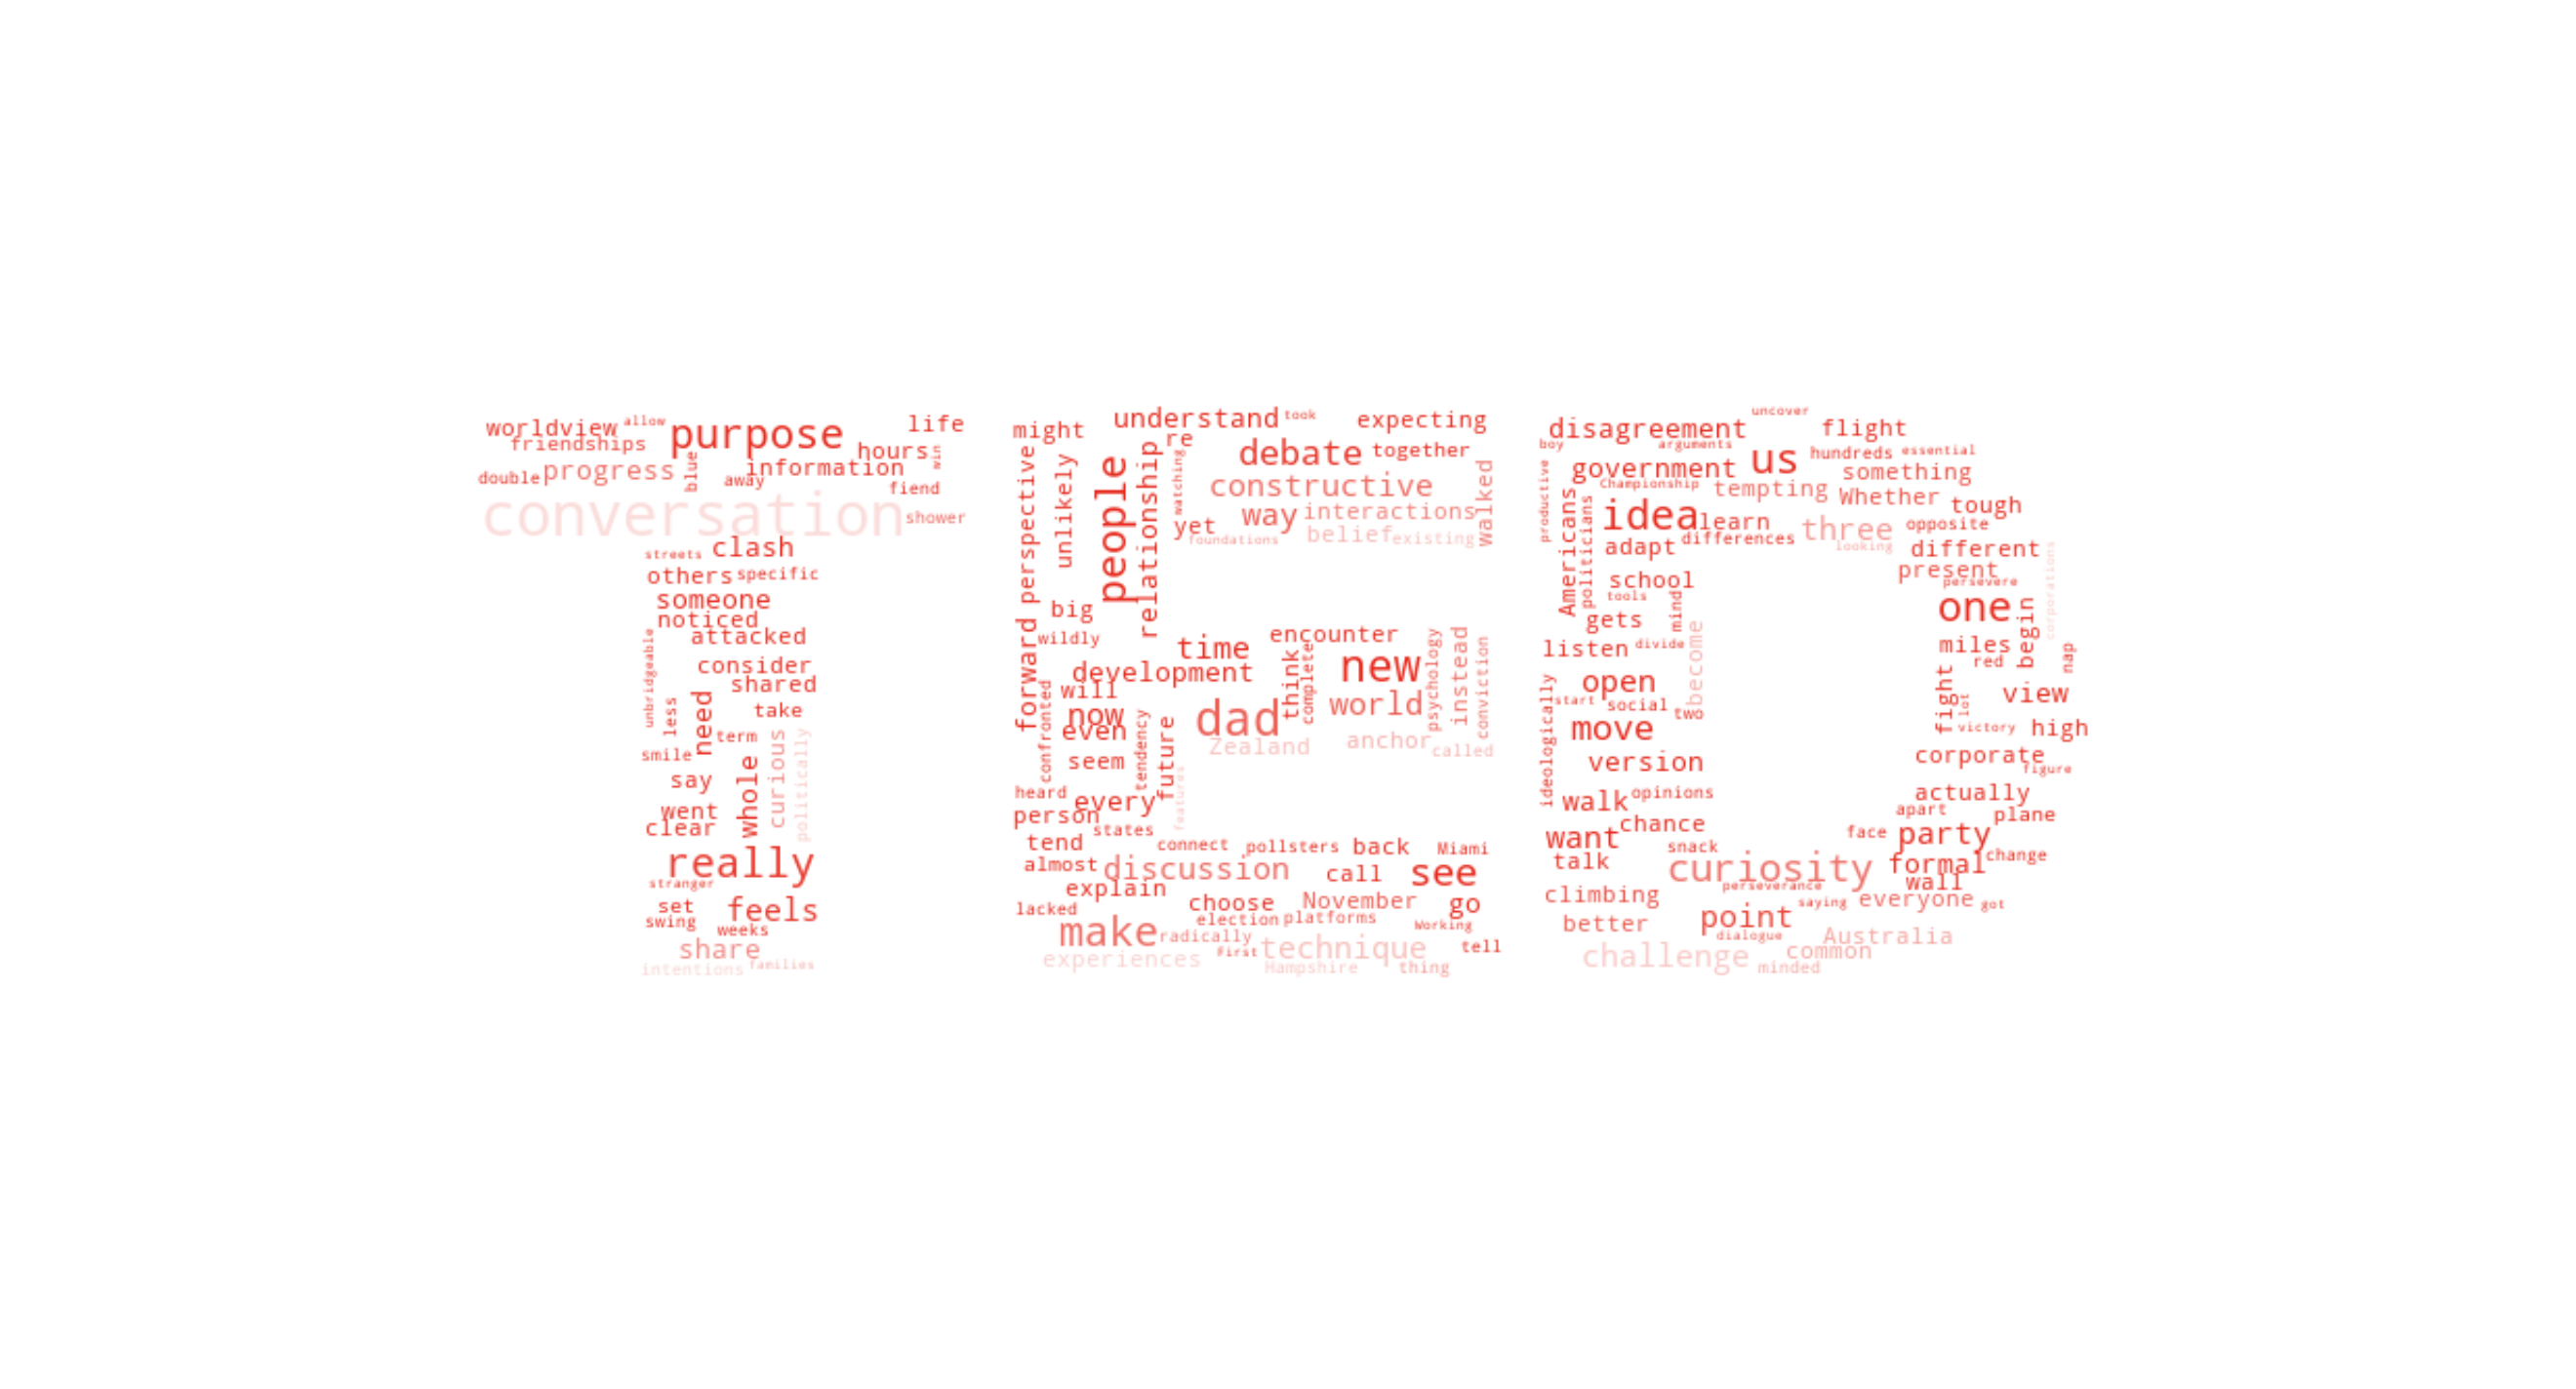

In [92]:
plt.figure(dpi=400)
plt.imshow(cloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()